<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [168]:
##### Your Code Here #####
import pandas as pd
# import boston housing data from keras
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

import os
import datetime
%load_ext tensorboard

In [226]:
#  split data between train and test sets
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [37]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'

In [227]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [147]:
X_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [11]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [10]:
print(X_test.shape)
X_test

(102, 13)


array([[1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [1.23290e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.94950e+02, 1.62100e+01],
       [5.49700e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.96900e+02, 9.74000e+00],
       ...,
       [1.83377e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.89610e+02, 1.92000e+00],
       [3.58090e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.91700e+02, 9.71000e+00],
       [2.92400e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.40160e+02, 9.81000e+00]])

In [148]:
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)


In [150]:
scaled_train

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

In [251]:
model = Sequential([
    Dense(64, activation='relu', input_dim=13, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(20, activation='relu', input_dim=13, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(1, activation='relu')
])

In [252]:
# compile RMSprop(0.001)
model.compile(loss='mse', optimizer=RMSprop(0.001), metrics=['mae'])

In [253]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

stop = EarlyStopping(monitor='val_mae', min_delta=0.01, patience=5)

model_object = model.fit(x=scaled_train, 
          y=y_train, 
          epochs=100, 
          validation_data=(scaled_test, y_test), 
          callbacks=[tensorboard_callback, stop])

Epoch 1/100
13/13 [==============================] - 0s 26ms/step - loss: 549.6570 - mae: 21.5400 - val_loss: 530.8231 - val_mae: 21.0547
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 452.6845 - mae: 18.9749 - val_loss: 401.9784 - val_mae: 17.5645
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 310.8139 - mae: 14.6986 - val_loss: 252.8779 - val_mae: 13.2226
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 190.8778 - mae: 10.7250 - val_loss: 164.1466 - val_mae: 10.0188
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 135.5542 - mae: 8.8928 - val_loss: 130.0327 - val_mae: 8.6995
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 122.3461 - mae: 8.3883 - val_loss: 111.7297 - val_mae: 7.8793
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 114.0202 - mae: 7.9476 - val_loss: 99.7704 - val_mae: 7.3431
Epoch 8/100
13/13 [============================

In [254]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 64)                896       
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_109 (Dense)            (None, 40)                2600      
_________________________________________________________________
dropout_20 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_110 (Dense)            (None, 20)                820       
_________________________________________________________________
dropout_21 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_111 (Dense)            (None, 1)               

In [255]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 1452), started 2 days, 1:12:58 ago. (Use '!kill 1452' to kill it.)

In [256]:
df1 = pd.DataFrame(model_object.history)
df1['epoch'] = model_object.epoch

In [257]:
df1

,loss,mae,val_loss,val_mae,epoch
0,549.657043,21.540030,530.823120,21.054731,0
1,452.684479,18.974865,401.978394,17.564518,1
2,310.813904,14.698573,252.877914,13.222648,2
3,190.877762,10.724983,164.146622,10.018781,3
4,135.554245,8.892763,130.032654,8.699516,4
5,122.346115,8.388323,111.729652,7.879331,5
6,114.020218,7.947617,99.770447,7.343098,6
7,90.841209,7.066311,84.615715,6.664969,7
8,86.316032,6.704585,71.373306,6.073022,8
9,83.928131,6.633408,67.431419,5.823883,9


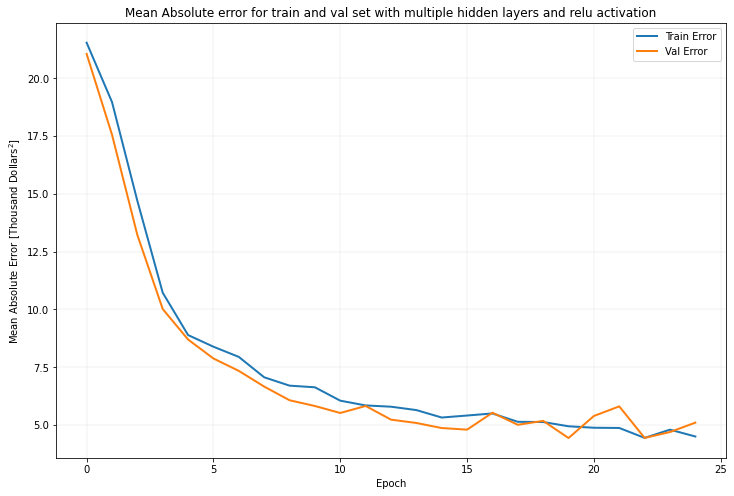

In [263]:
plt.figure(figsize=(12,8))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [Thousand Dollars$^2$]')
plt.plot(df1['epoch'], df1['mae'], label='Train Error', linewidth=2)
plt.plot(df1['epoch'], df1['val_mae'], label = 'Val Error', linewidth=2)
plt.legend()
plt.title("Mean Absolute error for train and val set with multiple hidden layers and relu activation")
plt.show()

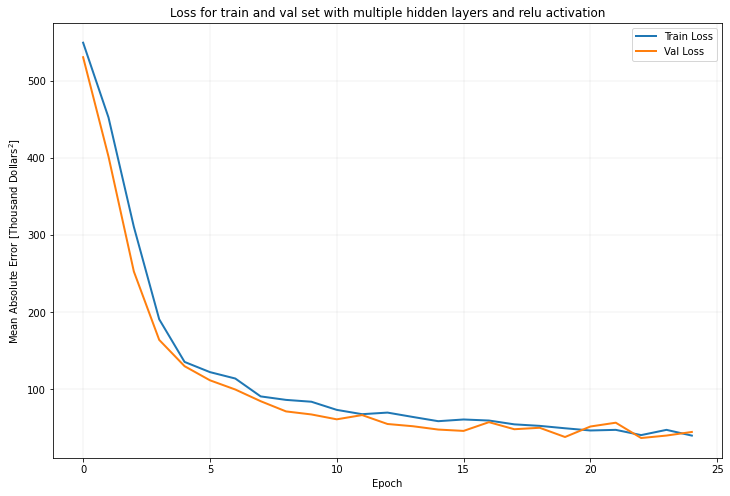

In [265]:
plt.figure(figsize=(12,8))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [Thousand Dollars$^2$]')
plt.plot(df1['epoch'], df1['loss'], label='Train Loss', linewidth=2)
plt.plot(df1['epoch'], df1['val_loss'], label = 'Val Loss', linewidth=2)
plt.legend()
plt.title("Loss for train and val set with multiple hidden layers and relu activation")
plt.show()

In [206]:
#linear model
model = Sequential([
    Dense(64, input_dim=13),
    Dense(1)
])
model.compile(loss='mse', metrics=['mae'])

In [228]:
data = model.fit(x=X_train, 
          y=y_train, 
          epochs=100, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/100
13/13 [==============================] - 0s 6ms/step - loss: 1457340.8750 - mae: 910.0515 - val_loss: 1054518.3750 - val_mae: 846.4078
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 1082975.8750 - mae: 814.7419 - val_loss: 805504.5625 - val_mae: 759.8593
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 837253.8125 - mae: 727.1871 - val_loss: 622680.8750 - val_mae: 670.8563
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 644141.1875 - mae: 648.5673 - val_loss: 473851.0938 - val_mae: 576.7670
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 485804.5938 - mae: 559.3646 - val_loss: 347643.1250 - val_mae: 492.8781
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 347707.6875 - mae: 473.0009 - val_loss: 238213.2031 - val_mae: 413.5009
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 237624.8281 - mae: 395.5673 - val_loss: 162170.5469 - 

In [208]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 1452), started 2 days, 0:38:22 ago. (Use '!kill 1452' to kill it.)

In [229]:
df = pd.DataFrame(data.history)
df['epoch'] = data.epoch

In [230]:
df

,loss,mae,val_loss,val_mae,epoch
0,1.457341e+06,910.051453,1.054518e+06,846.407776,0
1,1.082976e+06,814.741943,8.055046e+05,759.859314,1
2,8.372538e+05,727.187134,6.226809e+05,670.856323,2
3,6.441412e+05,648.567261,4.738511e+05,576.766968,3
4,4.858046e+05,559.364563,3.476431e+05,492.878113,4
...,...,...,...,...,...
95,4.163815e+02,17.029545,1.726824e+02,9.593771,95
96,4.887603e+02,18.705750,1.715206e+02,9.535362,96
97,4.587934e+02,17.180656,2.282976e+02,12.563926,97
98,3.609984e+02,15.437222,2.058258e+02,10.800204,98


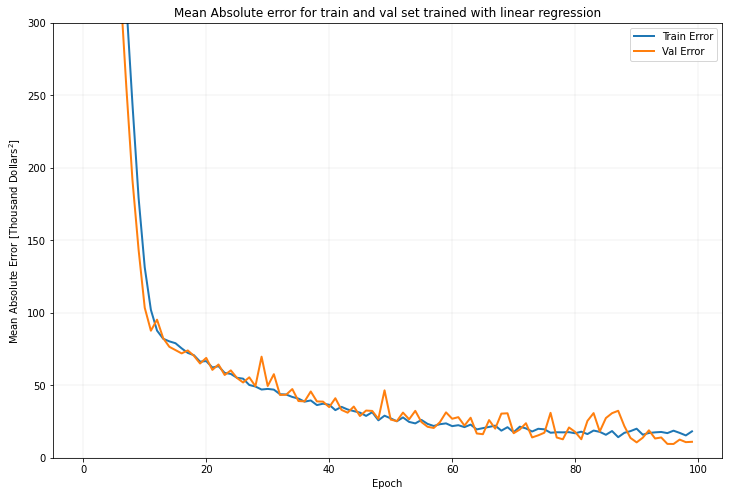

In [261]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [Thousand Dollars$^2$]')
plt.plot(df['epoch'], df['mae'], label='Train Error', linewidth=2)
plt.plot(df['epoch'], df['val_mae'], label = 'Val Error', linewidth=2)
plt.legend()
plt.ylim([0,300])
plt.title("Mean Absolute error for train and val set trained with linear regression")
plt.show()

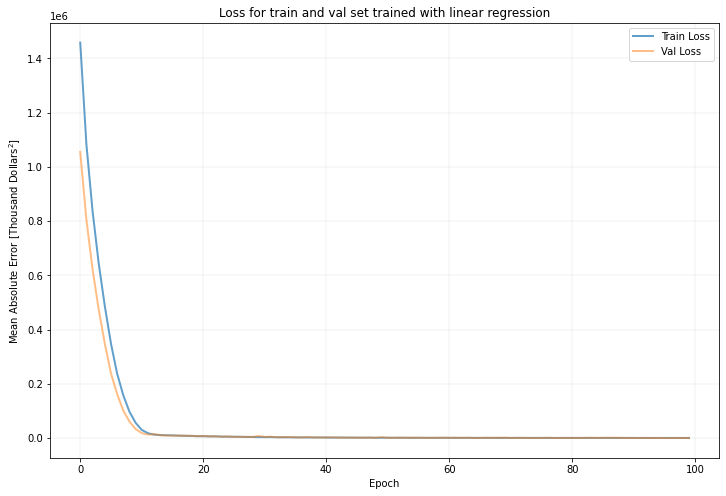

In [262]:
plt.figure(figsize=(12,8))
plt.grid(color='grey', linestyle='-', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error [Thousand Dollars$^2$]')
plt.plot(df['epoch'], df['loss'], label='Train Loss', linewidth=2, alpha=0.7)
plt.plot(df['epoch'], df['val_loss'], label = 'Val Loss', linewidth=2, alpha=0.5)
plt.legend()
plt.title("Loss for train and val set trained with linear regression")
plt.show()

### linear regression model performs good for this data, however better accuracy I got with more hidden layers, relu activation functions, regulzer, optimizer and Dropout.

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [ ]:
##### Your Code Here #####



## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.